In [5]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
pd.options.mode.chained_assignment = None  # default='warn'

In [6]:
df=pd.read_csv("C:\\Users\\vasan\\OneDrive\\Desktop\\office\\vasanth_DL\\customer_churn_dataset.csv")
df

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,Urban,0,Web,Discount,0
63996,5,38.91,0,1,Urban,1,Phone,Discount,0
63997,6,29.99,1,0,Urban,1,Phone,Discount,0
63998,1,552.94,1,0,Surburban,1,Multichannel,Buy One Get One,0


In [7]:
Q3=df["history"].quantile(0.75)
Q1=df["history"].quantile(0.25)
IQR=Q3-Q1
ul=Q3+1.5*IQR
ll=Q1-1.5*IQR

df=df[(df.history>ll)&(df.history<ul)]

<Axes: >

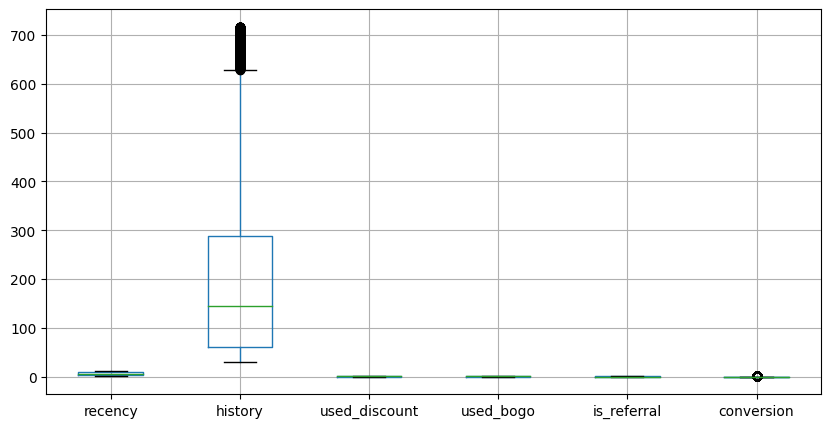

In [8]:
plt.figure(figsize=(10,5))
df.boxplot()

In [9]:
x=df.drop("conversion",axis=1)
y=df.conversion

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler


In [12]:
col=make_column_transformer((OneHotEncoder(sparse=False),['zip_code','channel','offer']),remainder='passthrough')

In [13]:
sc=StandardScaler()

In [14]:
knn=KNeighborsClassifier()

In [15]:
pipe=make_pipeline(col,sc,knn)

In [16]:
pipe.fit(x_train,y_train)

c:\Users\vasan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['zip_code', 'channel',
                                                   'offer'])])),
                ('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [17]:
pipe.score(x_train,y_train)

0.8653627849777694

In [18]:
pipe.score(x_test,y_test)

0.8356232411852342

In [19]:
y_pred=pipe.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
import pickle
pickle.dump(pipe,open("knnmodel.pkl","wb"))

In [21]:
x_test

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer
783,10,33.57,1,0,Urban,0,Phone,Discount
10258,3,292.79,1,0,Surburban,0,Multichannel,No Offer
48731,11,105.22,1,0,Surburban,1,Web,No Offer
58569,4,606.90,1,1,Surburban,1,Web,No Offer
39148,7,188.74,1,0,Rural,0,Phone,No Offer
...,...,...,...,...,...,...,...,...
59606,1,279.74,0,1,Urban,0,Web,Discount
33180,2,306.44,0,1,Surburban,0,Phone,No Offer
4958,1,96.30,0,1,Surburban,1,Web,No Offer
55351,5,374.27,1,0,Urban,1,Web,No Offer


In [22]:
y_test

783      0
10258    1
48731    0
58569    1
39148    1
        ..
59606    1
33180    0
4958     0
55351    1
697      0
Name: conversion, Length: 18123, dtype: int64